<a href="https://colab.research.google.com/github/Fat-AK/Implementing-ANNs-with-TensorFlow/blob/main/Hmw_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dataset mnist downloaded and prepared to ~/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [5]:
class_names = metadata.features['label'].names
print("Class names: {}".format(class_names))

Class names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [6]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [7]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

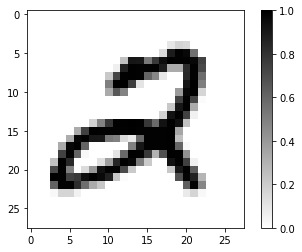

In [8]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

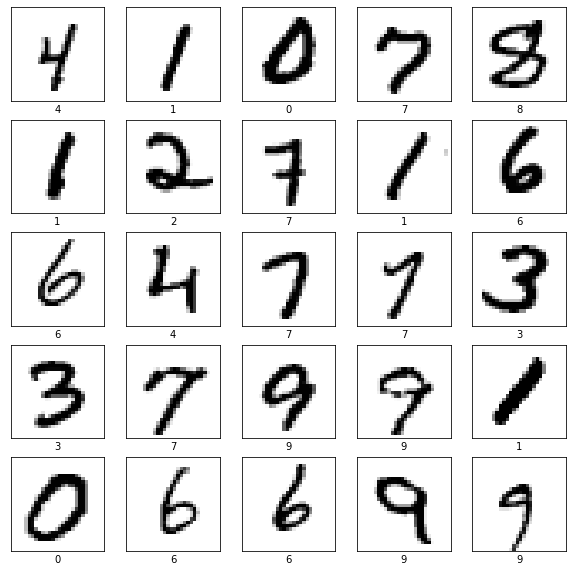

In [9]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

In [10]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28, 1)),tf.keras.layers.Dense(128, activation=tf.nn.relu), tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [12]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [13]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 11s 3ms/step - loss: 0.2550 - accuracy: 0.9280
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1129 - accuracy: 0.9660
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0776 - accuracy: 0.9772
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0592 - accuracy: 0.9822
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0437 - accuracy: 0.9863


In [14]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.0776 - accuracy: 0.9780
Accuracy on test dataset: 0.9779999852180481


In [ ]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()

  def sub1():
      for a in test_labels:
          if tf . add (a,a+1) >= 5:
            print (a, a+1)
 
sub1()


In [49]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  
def sub2():
  for a in test_labels:
    y = a - (a+1)
    predictions = model.predict(y)

print (predictions)

[[2.62661715e-08 2.96982057e-06 9.99994993e-01 1.46025997e-07
  6.47292495e-07 3.61047103e-09 5.51785263e-07 4.10693985e-08
  7.51180437e-07 1.35467131e-08]
 [9.99999881e-01 8.78096371e-19 3.80973329e-14 1.21173092e-17
  2.54714877e-15 2.70835038e-11 1.04777932e-07 3.00024644e-10
  3.89918783e-13 9.65933842e-15]
 [7.71517561e-13 5.57030482e-14 2.36488634e-10 3.31231501e-11
  9.99990582e-01 1.72458090e-13 5.73071278e-12 2.85819669e-06
  6.25106564e-12 6.58665067e-06]
 [2.71129884e-05 3.34290409e-04 3.41261475e-05 1.58583559e-03
  3.20955905e-07 1.29263746e-04 5.28164637e-05 2.39975579e-05
  9.97779906e-01 3.23562999e-05]
 [7.82661580e-09 5.80077132e-12 2.15510653e-07 3.57843123e-06
  5.35777589e-10 5.50027107e-11 1.06776228e-14 9.99989986e-01
  2.21587504e-09 6.21123627e-06]
 [2.53391397e-09 2.88584906e-10 3.12415382e-09 4.59131705e-10
  2.29837949e-09 1.56410579e-06 9.99998331e-01 9.94058622e-14
  1.03237980e-07 1.44454310e-10]
 [9.99999762e-01 3.03148724e-17 1.76950538e-10 9.40281449e